In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("temperature.csv")
print(df.shape)
df.head()

(7752, 25)


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
station             7750 non-null float64
Date                7750 non-null object
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope       

To check the presence of null value

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

exept lat,lon,DEM,Slope,Solar radiation every columns have null value

In [5]:
df["Date"].value_counts()

16-07-2015    25
04-08-2017    25
18-08-2014    25
08-07-2014    25
30-07-2013    25
              ..
14-08-2016    25
11-08-2014    25
27-07-2016    25
30-08-2014    25
11-07-2016    25
Name: Date, Length: 310, dtype: int64

it shows every day 25 data is recorded

In [6]:
df[df["Date"].isnull()==True]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


to convert date as int value

In [7]:
import datetime
df["Date"]=pd.to_datetime(df["Date"])
df["year"]=df["Date"].dt.year
df["months"]=df["Date"].dt.month
df["days"]=df["Date"].dt.day
df.drop(columns="Date",inplace=True)

to fill nan values 

In [8]:
df.fillna(df.median(),inplace=True)

In [9]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                0
months              0
days                0
dtype: int64

to visuzlize numerical data

In [10]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year', 'months', 'days'],
      dtype='object')

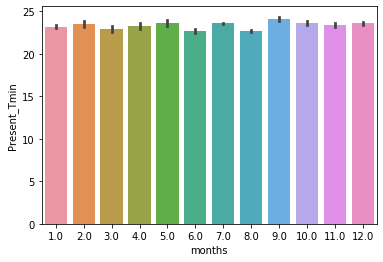

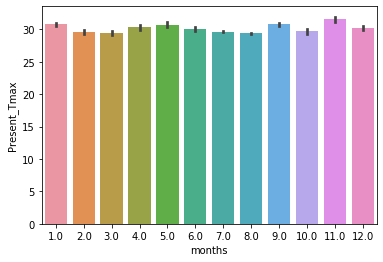

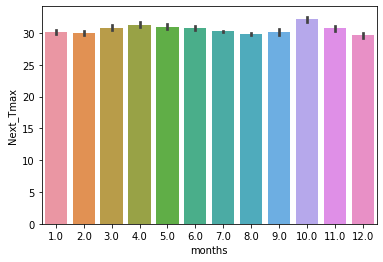

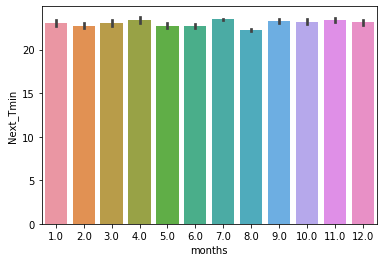

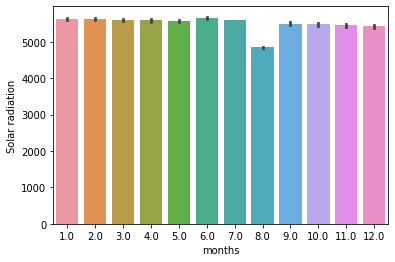

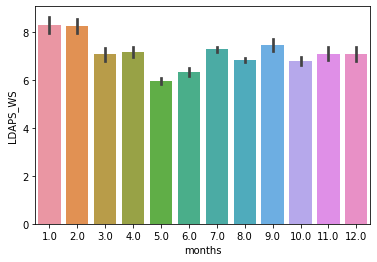

In [12]:
list1=["Present_Tmin","Present_Tmax","Next_Tmax",'Next_Tmin','Solar radiation',"LDAPS_WS"]
for i in list1:
    sns.barplot(df["months"],df[i])
    plt.show()

it shows wind speed, Solar radiation and temperature at present and at next date relation with every months for all years

temperature is max at 10 and 11 th month

And Solar radiation is looks low at 8th month

And Wind Speed is high at 1st and 2nd months and low at 5th and 6th months

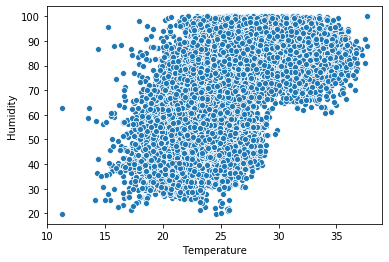

In [13]:
temp=df["Present_Tmin"].append(df["Present_Tmax"])
hum=df["LDAPS_RHmin"].append(df["LDAPS_RHmax"])
sns.scatterplot(x=temp,y=hum)
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()

it shows increase in humidity gives gradual increase in temperature 

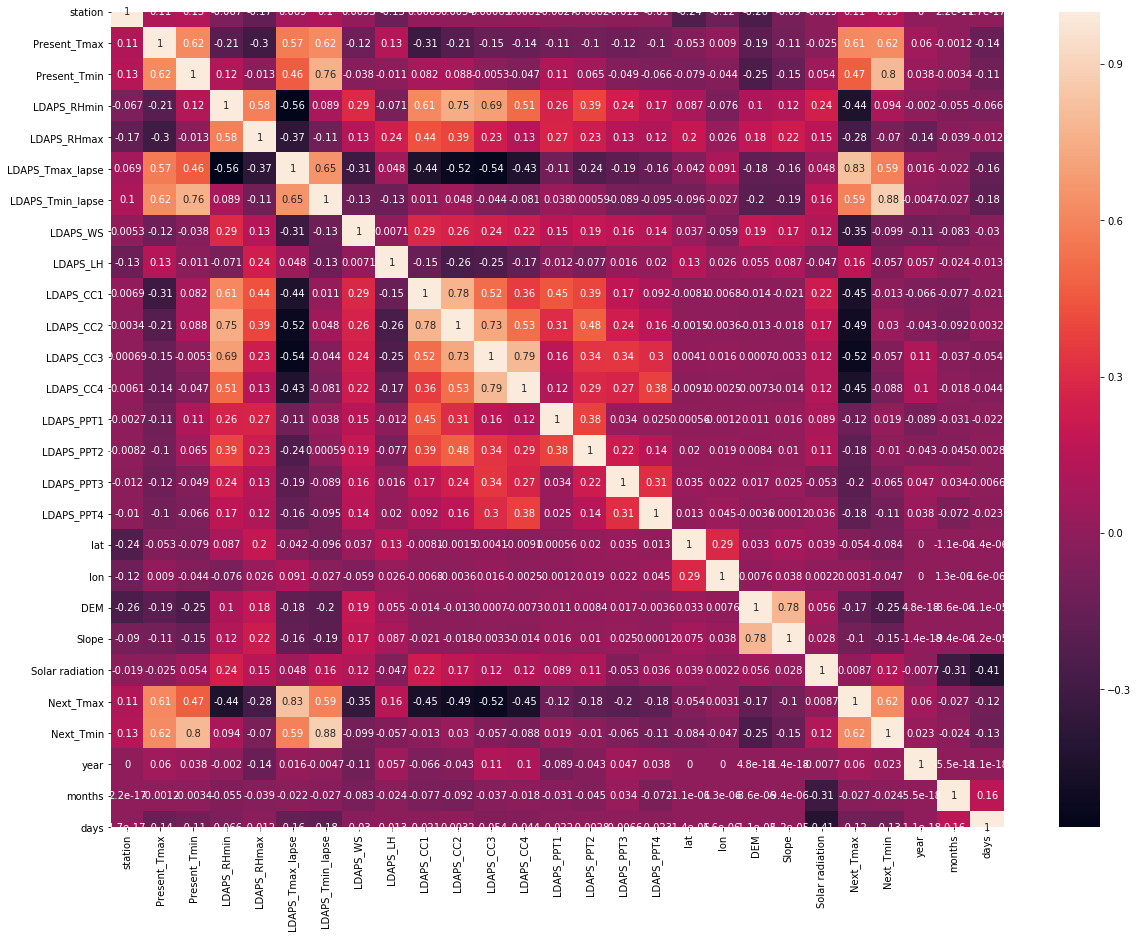

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

Humidity and cloud cover is a negative impact to predicted Temperature maximum

to check presence of outliers by use of box plot

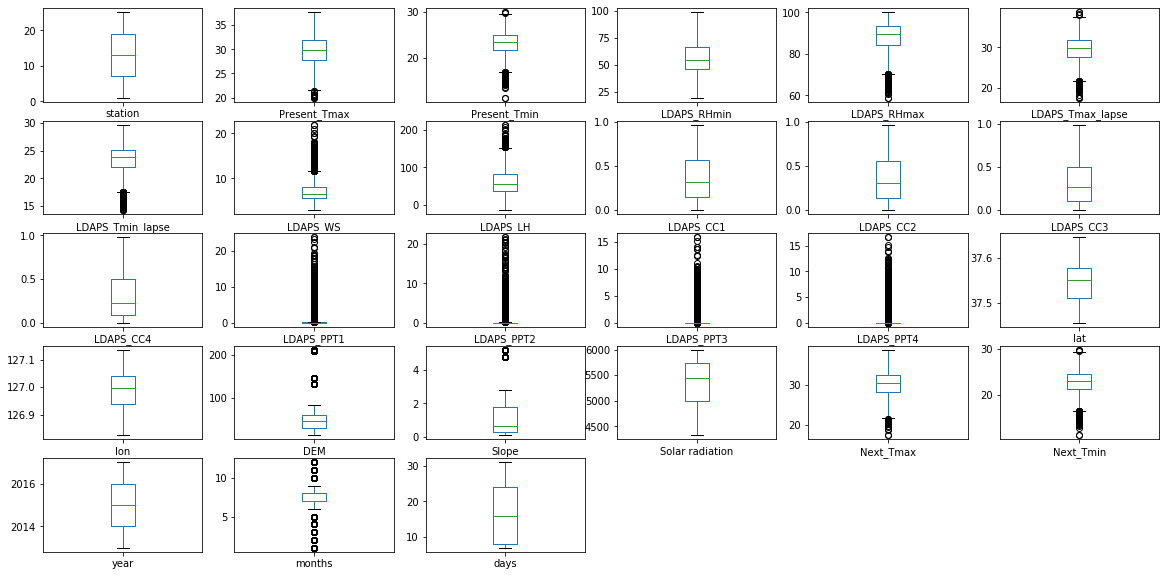

In [15]:
df.plot(kind="box",subplots=True,layout=(5,6),figsize=(20,10))
plt.show()

To check presence of skewness

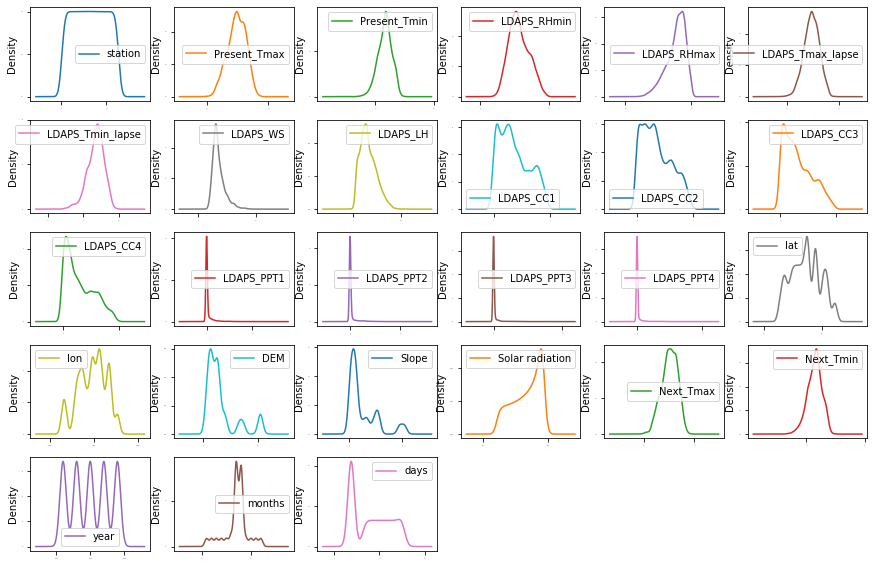

In [16]:
df.plot(kind="density",subplots=True,layout=(5,6),sharex=False,fontsize=1,figsize=(15,10))
plt.show()

In [17]:
df.skew().sort_values(ascending=False)

LDAPS_PPT4          6.826930
LDAPS_PPT3          6.458608
LDAPS_PPT2          5.776835
LDAPS_PPT1          5.395178
DEM                 1.723257
LDAPS_WS            1.584975
Slope               1.563020
LDAPS_LH            0.678315
LDAPS_CC4           0.673700
LDAPS_CC3           0.646670
LDAPS_CC2           0.477041
LDAPS_CC1           0.465003
LDAPS_RHmin         0.303565
days                0.245548
lat                 0.087062
year                0.000000
station             0.000000
LDAPS_Tmax_lapse   -0.228767
Present_Tmax       -0.265337
lon                -0.285213
Next_Tmax          -0.340943
Present_Tmin       -0.369481
Next_Tmin          -0.405143
Solar radiation    -0.511210
LDAPS_Tmin_lapse   -0.584737
months             -0.705303
LDAPS_RHmax        -0.860210
dtype: float64

To remove outliers in dataset

In [18]:
from scipy.stats import zscore
z=abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("Before removal of outlier : ",df.shape)
print("After removal of outlier : ",df1.shape)

Before removal of outlier :  (7752, 27)
After removal of outlier :  (6894, 27)


split data as input and output data

In [19]:
x=df1.drop(columns=["Next_Tmax","Next_Tmin"])
y=pd.concat([df1["Next_Tmin"],df1["Next_Tmin"]],axis=1)
y1=df1["Next_Tmin"]
y2=df1["Next_Tmax"]
y.shape

(6894, 2)

Training of model

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [21]:
def metrics(a,b):
    print("r2_score : ",r2_score(a,b))
    print("mean_squared_error : ",mean_squared_error(a,b))
    print("mean_absolute_error : ",mean_absolute_error(a,b))

In [22]:
def model(mod,xtrain,ytrain,xtest,ytest):
    mod.fit(xtrain,ytrain)
    pred=mod.predict(xtest)
    metrics(ytest,pred)

In [23]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y1,test_size=.20,random_state=40)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y2,test_size=.20,random_state=40)

For minimum temperature prediction

In [24]:
list1=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for i in list1:
    print("cross_val_score : ",cross_val_score(i,x,y1,cv=4).mean())
    model(i,xtrain1,ytrain1,xtest1,ytest1)
    print("_____"*20)

cross_val_score :  0.7709201903934565
r2_score :  0.8152293629740601
mean_squared_error :  1.0522090090179212
mean_absolute_error :  0.7968956077086575
____________________________________________________________________________________________________
cross_val_score :  0.5550479014947673
r2_score :  0.7519852047915988
mean_squared_error :  1.4123640319071793
mean_absolute_error :  0.8624365482233504
____________________________________________________________________________________________________
cross_val_score :  0.0649891166486593
r2_score :  0.48829438209494325
mean_squared_error :  2.913997969543147
mean_absolute_error :  1.3440174039158812
____________________________________________________________________________________________________
cross_val_score :  0.758728827351416
r2_score :  0.8802299733422606
mean_squared_error :  0.6820515591007978
mean_absolute_error :  0.6304060913705584
__________________________________________________________________________________________

Linear Regression is get a good accuracy score

In [25]:
para={"copy_X":["True","False"], "fit_intercept":["True","False"]}
gv=GridSearchCV(LinearRegression(),para,cv=4)
gv.fit(xtrain1,ytrain1)
mintemp=gv.predict(xtest1)
r2_score(ytest1,mintemp)

0.8152293629740601

In [26]:
import joblib
joblib.dump(mintemp,"mintemp.obj")

['mintemp.obj']

for maximum temperature prediction

In [27]:
for i in list1:
    print("cross_val_score : ",cross_val_score(i,x,y2,cv=4).mean())
    model(i,xtrain2,ytrain2,xtest2,ytest2)
    print("_____"*20)

cross_val_score :  0.6615480295969448
r2_score :  0.7542939049125363
mean_squared_error :  2.1317460711590717
mean_absolute_error :  1.0885905542766774
____________________________________________________________________________________________________
cross_val_score :  0.3986202639658831
r2_score :  0.7744070552096095
mean_squared_error :  1.9572443799854966
mean_absolute_error :  0.9953589557650471
____________________________________________________________________________________________________
cross_val_score :  0.13838519742578606
r2_score :  0.5308763687200142
mean_squared_error :  4.070116606236404
mean_absolute_error :  1.5486439448875997
____________________________________________________________________________________________________
cross_val_score :  0.6404157212689938
r2_score :  0.8848643832598141
mean_squared_error :  0.9989166062364028
mean_absolute_error :  0.7352719361856417
_________________________________________________________________________________________

LinearRegression is gave good accuracy than other model

In [28]:
para={"copy_X":["True","False"], "fit_intercept":["True","False"]}
gv=GridSearchCV(LinearRegression(),para,cv=4)
gv.fit(xtrain2,ytrain2)
maxtemp=gv.predict(xtest2)
r2_score(ytest2,maxtemp)

0.7542939049125363

In [29]:
import joblib
joblib.dump(maxtemp,"maxtemp.obj")

['maxtemp.obj']